In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import string
from scipy import stats
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import PoissonRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import GammaRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import Lasso

from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from wordcloud import WordCloud, STOPWORDS
from dataprep.clean import clean_df


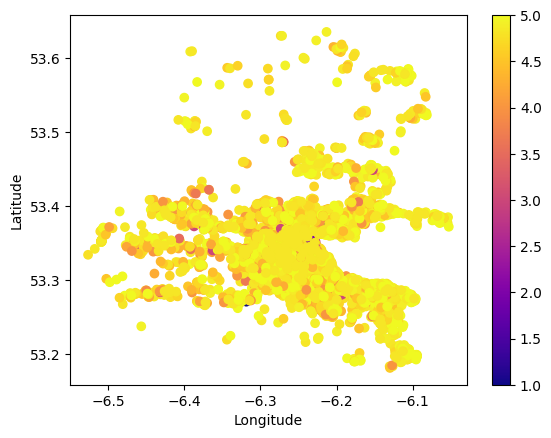

In [2]:
listingsDir = os.path.abspath('../Data/listings.csv')
reviewsDir = os.path.abspath('../Data/reviews.csv')
listings = pd.read_csv(listingsDir)
reviews = pd.read_csv(reviewsDir)
listings = pd.DataFrame(listings)
df = pd.DataFrame()
locations = listings.neighbourhood
locationsCL = listings.neighbourhood_cleansed
lat = listings.latitude
long = listings.longitude
df_y = listings.review_scores_location
df_y.fillna(df_y.median(), inplace=True)
df = pd.DataFrame(locations, locationsCL,lat,long,df_y)
x1=df.iloc[:,2]
#x1.fillna(x1.mean(), inplace=True)
x2=df.iloc[:,3]

x2.fillna(x2.mean(), inplace=True)
df_x=np.column_stack((long,lat))
df = shuffle(df)

fig = plt.figure()

ax = fig.add_subplot()
norm_lat=(lat-lat.min())/(lat.max()-lat.min())
norm_long=(long-long.min())/(long.max()-long.min())
norm_y=(df_y-df_y.min())/(df_y.max()-df_y.min())
cm = plt.cm.get_cmap('plasma')
plt.scatter(long,lat,c=df_y,cmap=cm)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
cbar = plt.colorbar()


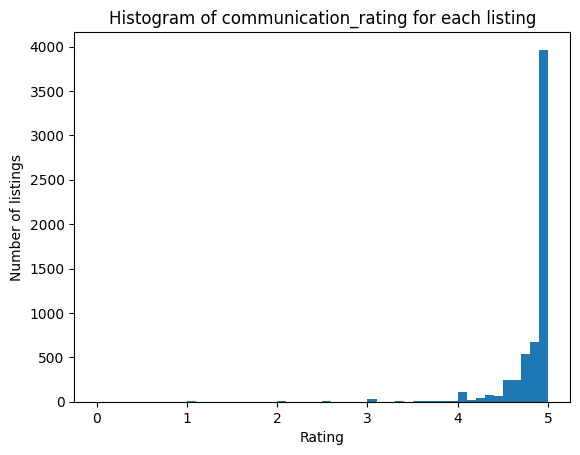

In [3]:
fig = plt.figure()
plt.hist(listings['review_scores_communication'], bins=50)
plt.title('Histogram of communication_rating for each listing')
plt.xlabel('Rating')
plt.ylabel('Number of listings')
plt.show()